In [1]:
# !pip install --upgrade accelerate
# !pip install --upgrade transformers

In [3]:
import transformers
import accelerate
print(f"Transformers version: {transformers.__version__}")
print(f"Accelerate version: {accelerate.__version__}")

Transformers version: 4.45.2
Accelerate version: 1.0.1


## Loading the Dataset

you can find the dataset info [here](https://huggingface.co/datasets/csebuetnlp/xlsum)

In [4]:
# Install the Datasets library
!pip install datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.7 MB/s eta 0:00:00


In [5]:
from datasets import load_dataset

dataset = load_dataset("csebuetnlp/xlsum", "arabic")

dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


0000.parquet:   0%|          | 0.00/95.1M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/10.6M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/10.6M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/37519 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4689 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4689 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text'],
        num_rows: 37519
    })
    test: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text'],
        num_rows: 4689
    })
    validation: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text'],
        num_rows: 4689
    })
})

In [6]:
dataset = dataset.remove_columns(['id', 'url', 'title'])

In [7]:
dataset

DatasetDict({
    train: Dataset({
        features: ['summary', 'text'],
        num_rows: 37519
    })
    test: Dataset({
        features: ['summary', 'text'],
        num_rows: 4689
    })
    validation: Dataset({
        features: ['summary', 'text'],
        num_rows: 4689
    })
})

In [8]:
dataset["train"][0]

{'summary': 'بدأت القوات الأوكرانية الانسحاب من شبه جزيرة القرم.',
 'text': 'وكان الرئيس الأوكراني المؤقت، الكسندر تورتشينوف، قد أمر بسحب جميع القوات الأوكرانية من القرم. وسيطرت قوات روسية صباح الاثنين على قاعدة بحرية أوكرانية في فيودوسيا، في ثالث هجوم من نوعه خلال 48 ساعة، وذلك بحسب تصريحات مسؤولين أوكرانيين لبي بي سي . وقال المتحدث باسم وزارة الدفاع الأوكرانية فلاديسلاف سيليزنيوف إن القوات الروسية هاجمت القاعدة وألقت القبض على الجنود الأوكرانيين في قاعدة فيودوسيا وقيدت أيادي ضباطهم. ومن المتوقع أن تسيطر الأزمة الأوكرانية على قمة مجموعة الدول الصناعية السبع في لاهاي. مواضيع قد تهمك نهاية وأكد الرئيس الأمريكي باراك أوباما خلال لقاء مع نظيره الصيني شى جين بينغ على أن "واشنطن وبكين يمكنهما، بالعمل سويا، تعزيز القانون الدولي واحترام سيادة الدول". وتسيطر قوات روسية حاليا على معظم القواعد العسكرية الأوكرانية في القرم التي أعلنت موسكو ضمها للاتحاد الروسي بعد استفتاء أجرته السلطات المحلية هناك. قلق بالغ وقال مارك لوين، مراسل بي بي سي في القرم، إن القوات الروسية تسيطر بشكل كامل على القاعدة، ون

In [9]:
def show_samples(dataset, num_samples=3, seed=42):
    sample = dataset["train"].shuffle(seed=seed).select(range(num_samples))
    for example in sample:
        print(f"\n'>> Summary: {example['summary']}'")
        print(f"'>> Text: {example['text']}'")

In [10]:
show_samples(dataset)


'>> Summary: شهدت مدينة القدس مناوشات متفرقة بين الجيش الإسرائيلي وشبان فلسطينيين في مناطق باب العامود وسلوان ورأس العامود في القدس الشرقية.'
'>> Text: نشرت الشرطة الإسرائيلية أكثر من خمسة آلاف من حرس الحدود في أحياء القدس الشرقية. وتقول مراسلة بي بي سي في القدس،نوال أسعد، إن شابا فلسطينيا في منطقة الطور أصيب برصاصة مطاطية في الرأس نقل على اثرها للمستشفى. كما اندلعت مواجهات عند حاجز قلنديا العسكري في مظاهرة قامت الشرطة بتفريقها باستخدام الغاز المسيل للدموع والرصاص المطاطي. وأضافت مراسلتنا أن متظاهرا ألقى قنبلة حارقة على الشرطة الإسرائيلية في منطقة باب العامود. وقد نشرت الشرطة أكثر من خمسة آلاف من حرس الحدود في أحياء المدينة وقالت إن هذا الانتشار سيستمر حتى شهر أكتوبر/تشرين الأول المقبل الذي يصادف أيضا نهاية الأعياد اليهودية. مواضيع قد تهمك نهاية وكان رئيس الوزراء الإسرائيلي ووزير الامن الداخلي أعلنا خطة لنشر من ٧٠٠ إلى ٩٠٠ من حرس الحدود في تسعة احياء في القدس الشرقية حتى الشهر المقبل. وتدرس لجنة الأمن التابعة للكنيست استدعاء احتياطي من حرس الحدود لضبط الأوضاع الأمنية في القدس الشرقية.

### Text & Summary length distributions

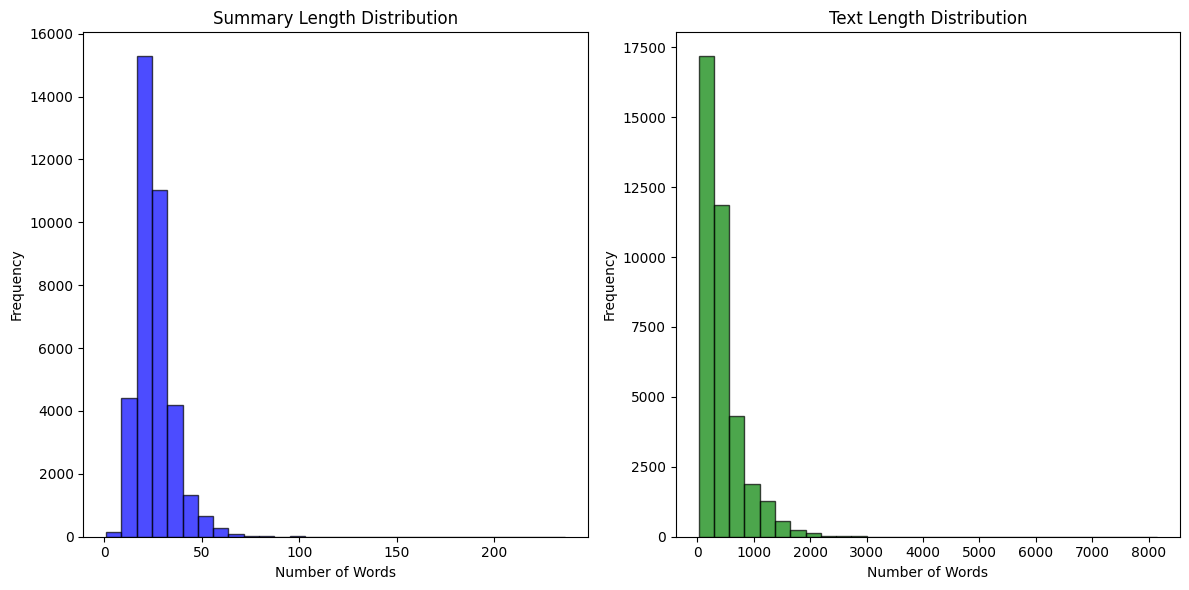

In [11]:
import matplotlib.pyplot as plt

# Function to calculate word count for a given text
def word_count(text):
    return len(text.split())

# Extracting word lengths for 'summary' and 'text' in the train set
train_data = dataset['train']
train_summary_lengths = [word_count(summary) for summary in train_data['summary']]
train_text_lengths = [word_count(text) for text in train_data['text']]

# Plotting histograms
plt.figure(figsize=(12, 6))

# Histogram for 'summary' lengths
plt.subplot(1, 2, 1)
plt.hist(train_summary_lengths, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Summary Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Histogram for 'text' lengths
plt.subplot(1, 2, 2)
plt.hist(train_text_lengths, bins=30, alpha=0.7, color='green', edgecolor='black')
plt.title('Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()


## Tokenization

you can find the model [here](https://huggingface.co/UBC-NLP/AraT5v2-base-1024) and for more info check this [repo](https://github.com/UBC-NLP/araT5)

In [12]:
from transformers import AutoTokenizer

# model_checkpoint = "google/mt5-small"
model_checkpoint = "UBC-NLP/AraT5v2-base-1024"

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

tokenizer_config.json:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/2.35M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.40M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Let’s test out the AraT5 tokenizer on a small example:

In [13]:
inputs = tokenizer("انا احب ان اشاهد كرة القدم!")
inputs

{'input_ids': [584, 3244, 129, 98670, 5808, 4148, 109650, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

In [14]:
tokenizer.convert_ids_to_tokens(inputs.input_ids)

['▁انا', '▁احب', '▁ان', '▁اشاهد', '▁كرة', '▁القدم', '!', '</s>']

The special Unicode character `▁` and end-of-sequence token `</s>` indicate that we’re dealing with the `SentencePiece` tokenizer

In [15]:
max_input_length = 512
max_target_length = 35


def preprocess_function(examples):
    model_inputs = tokenizer(
        examples["text"],
        max_length=max_input_length,
        truncation=True,
    )
    labels = tokenizer(
        examples["summary"], max_length=max_target_length, truncation=True
    )
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [16]:
tokenized_datasets = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/37519 [00:00<?, ? examples/s]

Map:   0%|          | 0/4689 [00:00<?, ? examples/s]

Map:   0%|          | 0/4689 [00:00<?, ? examples/s]

## Evaluation Metric

for more info about the metric check [this](https://pypi.org/project/rouge-score/)

In [17]:
# Install the  rouge_score package
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=1688c46d48d1447d85b8a5f7c87391219697bdc4b849a8d074bacb8c3664b069
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [18]:
# import the rouge scorer method
from rouge_score import rouge_scorer

# Initialize RougeScorer with desired metrics
rouge_score = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL', 'rougeLsum'], tokenizer=tokenizer)

In [19]:
generated_summary = "ذهب محمد و احمد الى النادي"
reference_summary = "ذهب محمد و صديقه احمد الى النادي للعب كرة القدم في الصباح"

In [20]:
ROU = rouge_score.score(reference_summary, generated_summary)
ROU

{'rouge1': Score(precision=1.0, recall=0.5, fmeasure=0.6666666666666666),
 'rouge2': Score(precision=0.8, recall=0.36363636363636365, fmeasure=0.5000000000000001),
 'rougeL': Score(precision=1.0, recall=0.5, fmeasure=0.6666666666666666),
 'rougeLsum': Score(precision=1.0, recall=0.5, fmeasure=0.6666666666666666)}

### Creating a strong baseline

In [21]:
!pip install nltk

In [22]:
import nltk

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
from nltk.tokenize import sent_tokenize


def three_sentence_summary(text):
    return "\n".join(sent_tokenize(text)[:3])


print(three_sentence_summary(dataset["train"][0]["text"]))

وكان الرئيس الأوكراني المؤقت، الكسندر تورتشينوف، قد أمر بسحب جميع القوات الأوكرانية من القرم.
وسيطرت قوات روسية صباح الاثنين على قاعدة بحرية أوكرانية في فيودوسيا، في ثالث هجوم من نوعه خلال 48 ساعة، وذلك بحسب تصريحات مسؤولين أوكرانيين لبي بي سي .
وقال المتحدث باسم وزارة الدفاع الأوكرانية فلاديسلاف سيليزنيوف إن القوات الروسية هاجمت القاعدة وألقت القبض على الجنود الأوكرانيين في قاعدة فيودوسيا وقيدت أيادي ضباطهم.


In [24]:
# Function to evaluate using rouge_scorer
def evaluate_baseline(dataset, rouge_scorer):
    # Generate summaries for each text in the dataset
    summaries = [three_sentence_summary(text) for text in dataset["text"]]
    # Calculate scores for each prediction-reference pair
    scores = [
        rouge_scorer.score(reference, prediction)
        for reference, prediction in zip(dataset["summary"], summaries)
    ]
    # Average the scores over the dataset
    averaged_scores = {
        "rouge1": sum(score["rouge1"].fmeasure for score in scores) / len(scores),
        "rouge2": sum(score["rouge2"].fmeasure for score in scores) / len(scores),
        "rougeL": sum(score["rougeL"].fmeasure for score in scores) / len(scores),
        "rougeLsum": sum(score["rougeLsum"].fmeasure for score in scores) / len(scores),
    }
    return averaged_scores

In [25]:
# Evaluate the dataset
score = evaluate_baseline(dataset["validation"], rouge_score)

# Format the scores to show percentages rounded to two decimal places
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
rouge_dict = {rn: round(score[rn] * 100, 2) for rn in rouge_names}
rouge_dict

{'rouge1': 16.12, 'rouge2': 4.2, 'rougeL': 11.71, 'rougeLsum': 13.51}

## Model Defining

In [26]:
from transformers import AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

config.json:   0%|          | 0.00/699 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

**Model Arguments**

In [27]:
from transformers import Seq2SeqTrainingArguments

model_path = '/content/drive/MyDrive/Summarization/model'


args = Seq2SeqTrainingArguments(
    output_dir=model_path + "/finetuned-arat5-xlsum",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    weight_decay=0.01,
    save_total_limit=1,
    num_train_epochs=1,
    predict_with_generate=True,
    disable_tqdm= False
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


**compute metrics during the training**

In [28]:
import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    # Decode generated summaries into text
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    # Replace -100 in the labels as we can't decode them
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    # Decode reference summaries into text
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    # ROUGE expects a newline after each sentence
    decoded_preds = ["\n".join(sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(sent_tokenize(label.strip())) for label in decoded_labels]

    # Compute ROUGE scores for each prediction and reference pair
    rouge_scores = {'rouge1': [], 'rouge2': [], 'rougeL': [], 'rougeLsum': []}
    for pred, label in zip(decoded_preds, decoded_labels):
        scores = rouge_score.score(label, pred)
        for key in rouge_scores.keys():
            rouge_scores[key].append(scores[key].fmeasure)

    # Calculate the average ROUGE scores across all samples
    avg_rouge_scores = {key: np.mean(values) * 100 for key, values in rouge_scores.items()}

    # Round the results for easier readability
    return {k: round(v, 4) for k, v in avg_rouge_scores.items()}


**define a data collator for our sequence-to-sequence task**

In [29]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [30]:
tokenized_datasets = tokenized_datasets.remove_columns(
    dataset["train"].column_names
)

In [31]:
features = [tokenized_datasets["train"][i] for i in range(2)]
data_collator(features)

{'input_ids': tensor([[ 2163,  1413, 68318,  ...,  5169,   114,     1],
        [22238,   885,   247,  ...,  3397, 11244,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'labels': tensor([[  6049,   4783,  68318,    771,  22974,     36,  10203,  17642,  76147,
         109566,      1,   -100,   -100,   -100,   -100,   -100,   -100,   -100,
           -100,   -100,   -100,   -100,   -100,   -100,   -100,   -100,   -100,
           -100,   -100,   -100,   -100,   -100,   -100,   -100,   -100],
        [   151,    682,   6854,   7771,  31574,  28325,  64801,  41656,  51745,
          20392,    218,    422,    141,    151,  37126,  41426,  14463, 109610,
         109598,  84401,  52644,    605,     83,     83,   7345,  13294,     83,
          11501,     83,    114,   9254,   6839,  53024,    378,      1]]), 'decoder_input_ids': tensor([[     0,   6049,   4783,  68318,    771,  22974,     36,  10203,  17642,
          76147, 109566,      1,

**instantiate the trainer with the standard arguments**

In [32]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    model,
    args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

### Start Training

In [33]:
trainer.train()

Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
1,3.129100,2.414827,28.015900,12.853700,24.419200,24.461200


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1220: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


TrainOutput(global_step=4690, training_loss=3.310556830627832, metrics={'train_runtime': 6846.5656, 'train_samples_per_second': 5.48, 'train_steps_per_second': 0.685, 'total_flos': 3.2521287299014656e+16, 'train_loss': 3.310556830627832, 'epoch': 1.0})

## Saving the model

In [34]:
trainer.save_model(model_path + "/summarization_model")

## Evaluating the model

In [35]:
trainer.evaluate()

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1220: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


{'eval_loss': 2.4148266315460205,
 'eval_rouge1': 28.0159,
 'eval_rouge2': 12.8537,
 'eval_rougeL': 24.4192,
 'eval_rougeLsum': 24.4612,
 'eval_runtime': 845.4825,
 'eval_samples_per_second': 5.546,
 'eval_steps_per_second': 0.694,
 'epoch': 1.0}

## Loading and using the model

In [37]:
from transformers import pipeline

fine_tuned_model = model_path + "/summarization_model"
summarizer = pipeline("summarization", model=fine_tuned_model)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [38]:
def print_summary(idx):
    text = dataset["test"][idx]["text"]
    summary = dataset["test"][idx]["summary"]
    summary = summarizer(dataset["test"][idx]["text"])[0]["summary_text"]
    print(f"'>>> Text: {text}'")
    print(f"\n'>>> Summary: {summary}'")
    print(f"\n'>>> Generated Summary: {summary}'")

In [39]:
print_summary(100)

'>>> Text: كان بيكهام ضمن الوفد الرسمي البريطاني الذي نقل الشعلة إلى بريطانيا وكان بيكهام يأمل في أن يكون ضمن قائمة المدرب ستيورات بيرس لأول فريق كرة قدم يمثل بريطانيا في الأولمبياد منذ دورة روما عام 1960. ويذكر أن بريطانيا ليس لها منتخب واحد في كرة القدم، حيث توجد منتخبات منفصلة لانجلترا وويلز واسكتلندا وايرلندا الشمالية. وأعرب بيكهام( 37 عاما) عن خيبة أملة تجاه القرار مضيفا أنه لن يكون هناك أحد أكثر منه تشجيعا للفريق. وأضاف أنه كان سيكون فخورا بالانضمام إلى الفريق البريطاني ويتمنى مثل الجميع أن يفوز الفريق بالميدالية الذهبية مواضيع قد تهمك نهاية وكان المدرب ستيورات بيرس قد ضم بيكهام في قائمته الأولية التي ضمت 35 لاعبا، وتابع المدرب أداء اللاعب أخيرا مع نادي لوس أنجيلوس غالاكسي الأمريكي وفضل الاستعانة بمدافع مانشستر سيتي ميكا ريتشاردز في القائمة النهائية التي ضمت 18 لاعبا. والتقى بيرس مساء الأربعاء مع بيكهام وأبلغه القرار مشيرا إلى أنه كان بحاجة لتعزيز دفاعات الفريق. ويسمح للمنتخبات المشاركة في الأولمبياد بضم ثلاثة لاعبين فقط فوق سن 23 عاما، ولذا اختار بيرس ريتشاردز و مدافع مانشستر يو

In [40]:
print_summary(0)

'>>> Text: نضال حسن واعترف نضال حسن، الذي يدافع عن نفسه، بقتل الجنود، متحججا بحماية المسلمين وعناصر طالبان في أفغانستان، ولكن القاضي العسكري رفض حجته "بحماية الآخرين". وإذا أدين حسن، البالغ من العمر 42 عاما، بقتل 13 شخصا وجرح آخرين فإنه سيواجه عقوبة الإعدام. ويعتبر الحادث الأكثر دموية من بين الهجمات غير القتالية التي وقعت في قاعدة عسكرية أمريكية. وقال شهود عيان دخل في 5 نوفمبر/تشرين الثاني عام 2009 مصحة تعج بالجنود الذين كانوا ينتظرون أدوارهم إجراء فحوصات طبية أو التلقيح، ثم صعد على مكتب، وأطلق النار من سلاحين بيديه، دون توقف إلا لإعادة تعبئة السلاح. مواضيع قد تهمك نهاية وسيقدم ممثلو الادعاء أدلة تفيد بأن حسن مال إلى الأفكار المتطرفة، وكان يزور المواقع بحثا عن ّالجهاديين" وطالبان، ساعات قبل الهجوم. وكان الرائد حسن سيلتحق بالقوات الأمريكية في أفغانستان قبل أن ينفذ هجومه. "عنف في مكان العمل" وصنفت وزارة الدفاع الأمريكية الحادث باعتباره "عنفا في مكان العمل" بدلا من تصنيفه "عملا إرهابيا"، وهو ما أغضب عئلات الضحايا، حسب ما أفاد به مراسل بي بي سي، نك براينت، في فروت هود. ويتوقع أن يدلي العدي